In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('/kaggle/input/daily-power-generation-in-india-2013-2023/Daily_Power_Gen_States_march_23.csv')
df.head()

/kaggle/input/daily-power-generation-in-india-2013-2023/Daily_Power_Gen_Source_march_23.csv
/kaggle/input/daily-power-generation-in-india-2013-2023/Daily_Power_Gen_States_march_23.csv


Region       States  Max.Demand Met during the day(MW)  \
0    NER      Mizoram                                 77   
1     WR           DD                                214   
2     WR          Goa                                383   
3     WR  Maharashtra                              14837   
4     WR           MP                               5740   

   Shortage during maximum Demand(MW)  Energy Met (MU)        date  
0                                 1.0              1.2  2015-01-01  
1                                 0.0              4.8  2015-01-01  
2                                 0.0              7.3  2015-01-01  
3                                57.0            315.0  2015-01-01  
4                                 0.0            109.8  2015-01-01

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126699 entries, 0 to 126698
Data columns (total 6 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Region                              126699 non-null  object 
 1   States                              126699 non-null  object 
 2   Max.Demand Met during the day(MW)   126699 non-null  int64  
 3   Shortage during maximum Demand(MW)  126680 non-null  float64
 4   Energy Met (MU)                     126698 non-null  float64
 5   date                                126699 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.8+ MB


### handling the missing values, as they are very low, we will fill with them with mean

In [3]:
df["Energy Met (MU)"] = df["Energy Met (MU)"].fillna(df["Energy Met (MU)"].mean())
df['Shortage during maximum Demand(MW)'] = df['Shortage during maximum Demand(MW)'].fillna(df['Shortage during maximum Demand(MW)'].mean())

In [4]:
df['States'].unique()

array(['Mizoram', 'DD', 'Goa', 'Maharashtra', 'MP', 'Gujarat',
       'Chhattisgarh', 'DNH', 'Chandigarh', 'HP', 'Uttarakhand', 'UP',
       'Delhi', 'Rajasthan', 'Haryana', 'J&K', 'Punjab', 'Essar steel',
       'Andhra Pradesh', 'Meghalaya', 'Manipur', 'Assam',
       'Arunachal Pradesh', 'Sikkim', 'West Bengal', 'Odisha',
       'Jharkhand', 'DVC', 'Bihar', 'Pondy', 'Tamil Nadu', 'Kerala',
       'Karnataka', 'Telangana', 'Nagaland', 'Tripura',
       'J&K(UT) and Ladakh(UT)', 'J&K(UT) & Ladakh(UT)', 'AMNSIL',
       'Puducherry', 'BALCO', 'DNHDDPDCL', 'J&K(UT) & \nLadakh(UT)',
       'J&K(UT) &', 'Railways_NR ISTS'], dtype=object)

In [5]:
# average Max Demand and Shortage by State
average_max_demand = df.groupby('States')['Max.Demand Met during the day(MW)'].mean()
average_shortage = df.groupby('States')['Shortage during maximum Demand(MW)'].mean()


### Extracting the top 10 states with maximum demand and shortages

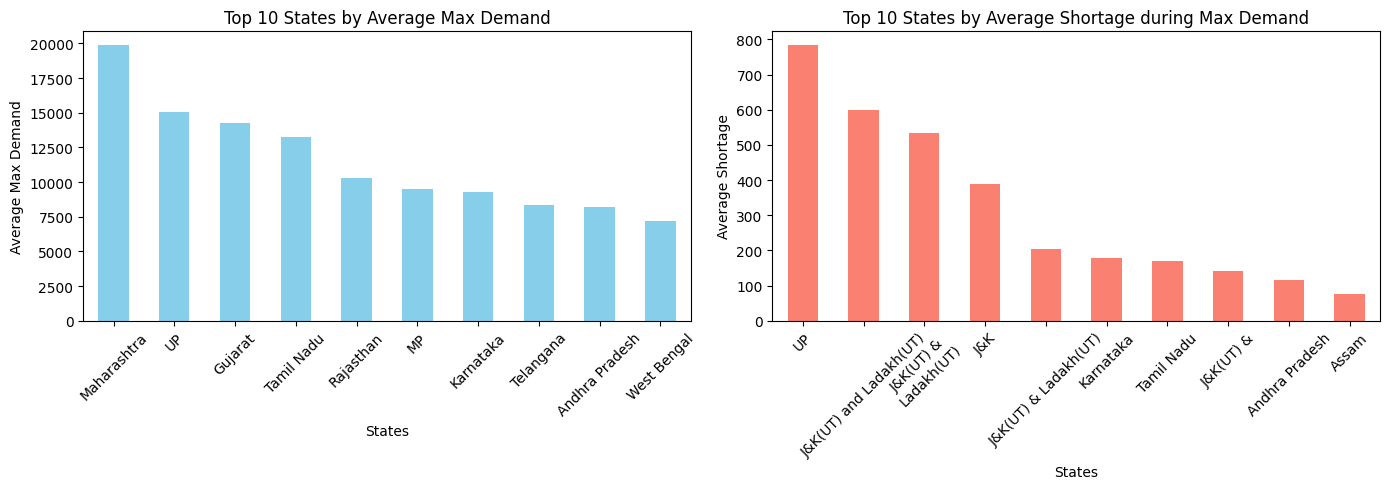

In [6]:
top_10_max_demand = average_max_demand.nlargest(10)
top_10_shortage = average_shortage.nlargest(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

top_10_max_demand.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Top 10 States by Average Max Demand')
ax1.set_xlabel('States')
ax1.set_ylabel('Average Max Demand')
ax1.tick_params(axis='x', rotation=45)

top_10_shortage.plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Top 10 States by Average Shortage during Max Demand')
ax2.set_xlabel('States')
ax2.set_ylabel('Average Shortage')
ax2.tick_params(axis='x', rotation=45)

# Display the plots
plt.tight_layout()
plt.show()


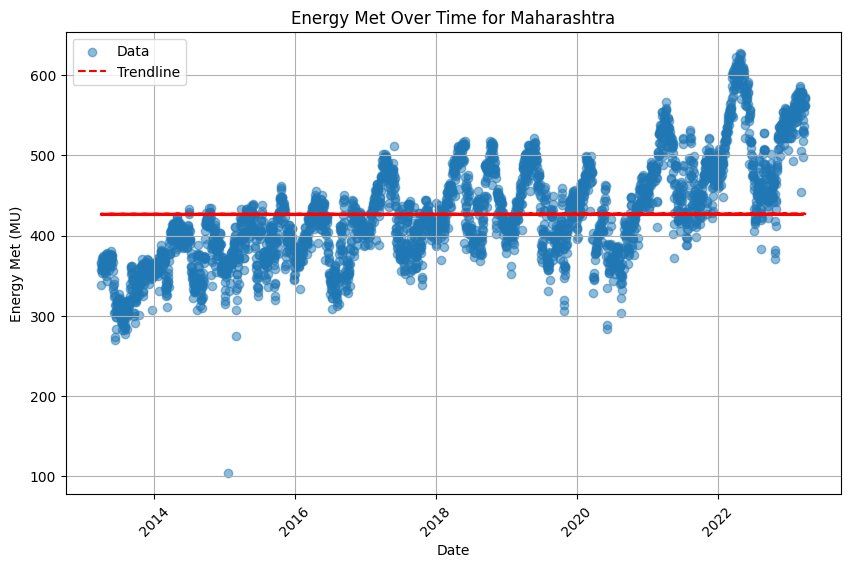

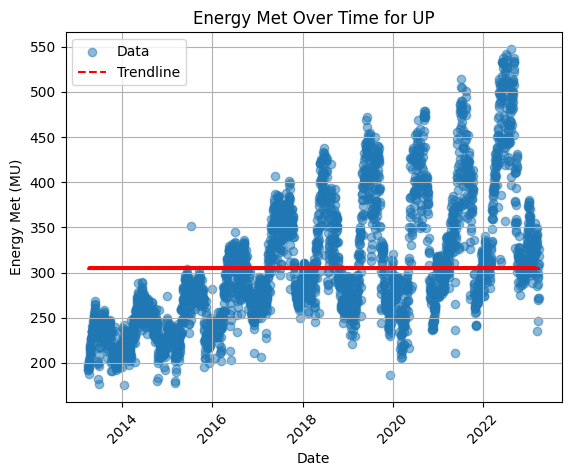

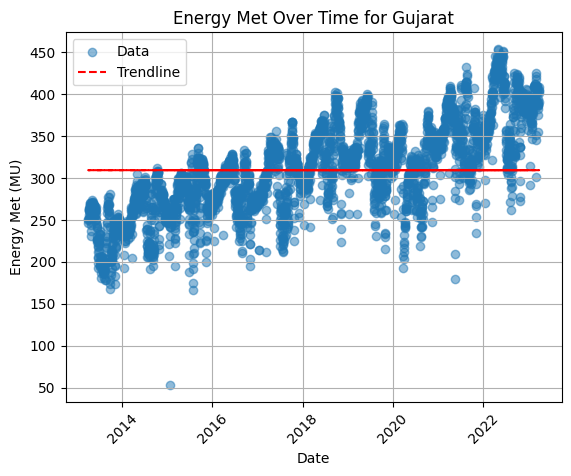

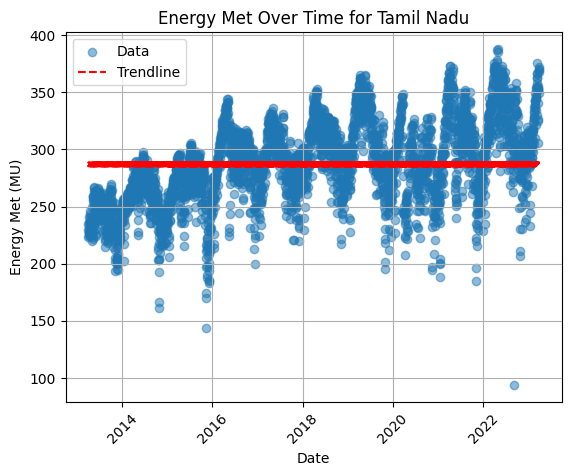

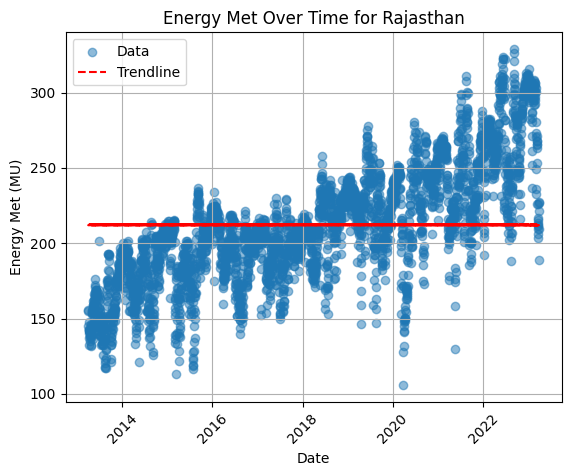

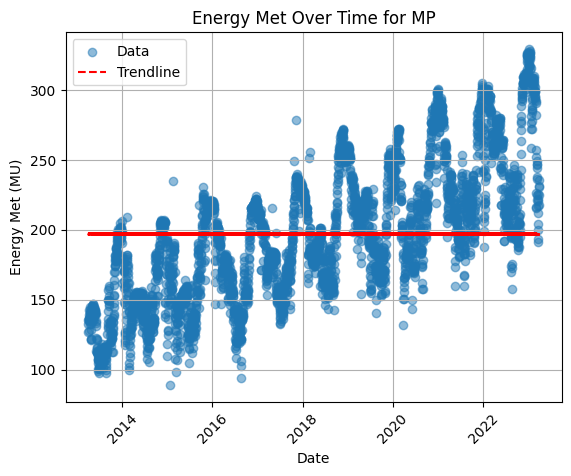

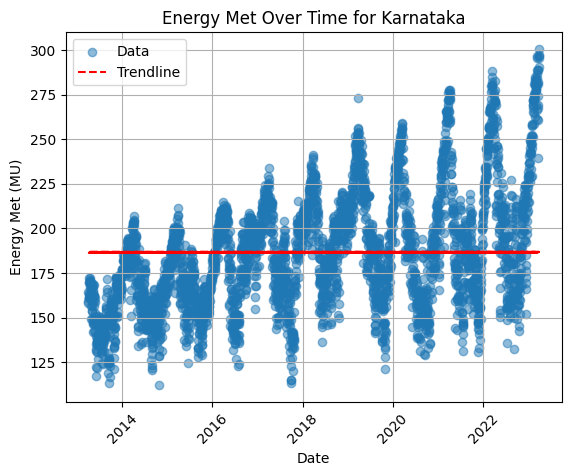

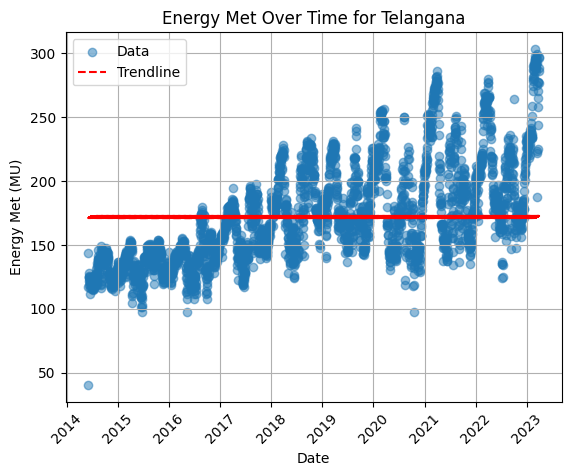

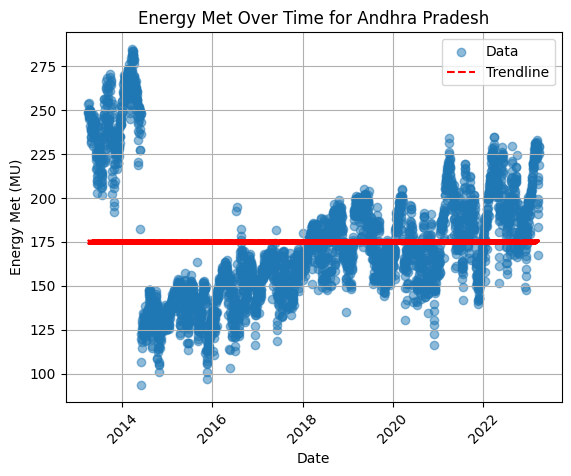

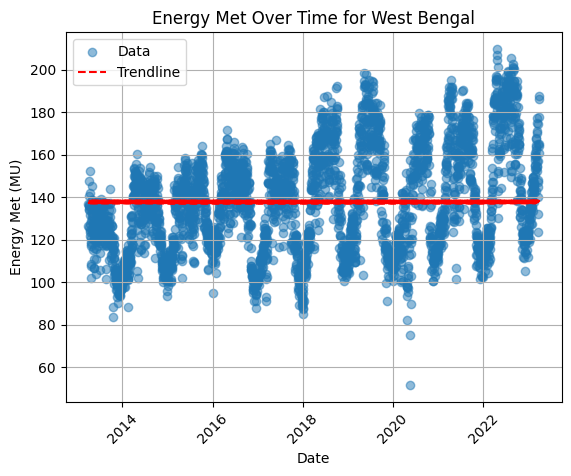

In [7]:
import matplotlib.pyplot as p
from sklearn.linear_model import LinearRegression

df['date'] = pd.to_datetime(df['date'])

states_to_analyze = top_10_max_demand.index
plt.figure(figsize=(10, 6))

for state in states_to_analyze:
    state_data = df[df['States'] == state]
    
    X = np.arange(len(state_data)).reshape(-1, 1)
    y = state_data['Energy Met (MU)'].values
    model = LinearRegression()
    model.fit(X, y)
    
    trendline = model.predict(X)
    
    plt.scatter(state_data['date'], state_data['Energy Met (MU)'], label='Data', alpha=0.5)
    
    plt.plot(state_data['date'], trendline, label='Trendline', linestyle='--', color='red')
    
    plt.title(f'Energy Met Over Time for {state}')
    plt.xlabel('Date')
    plt.ylabel('Energy Met (MU)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


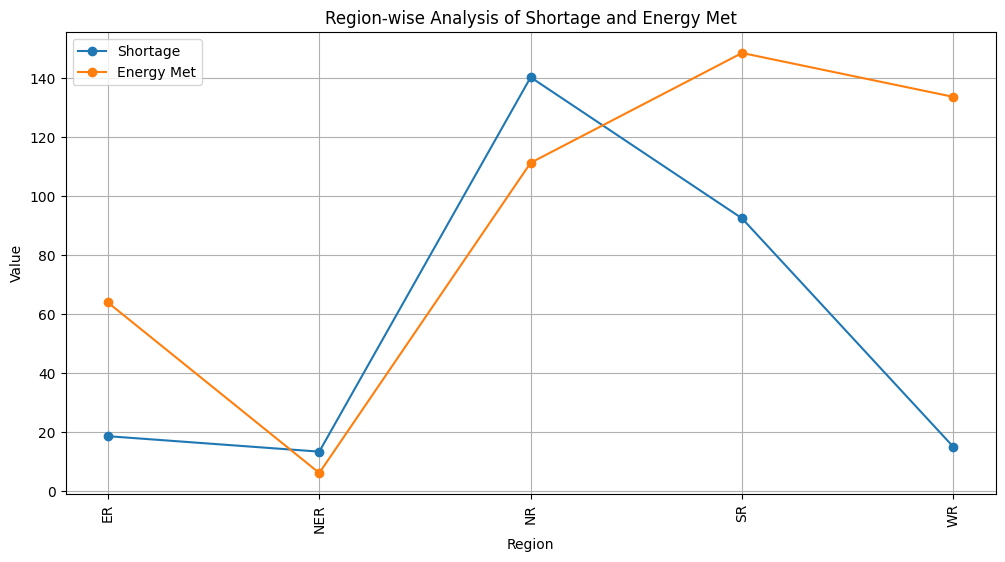

In [8]:
agg_df = df.groupby('Region').agg({
    'Shortage during maximum Demand(MW)': 'mean',
    'Energy Met (MU)': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(agg_df['Region'], agg_df['Shortage during maximum Demand(MW)'], label='Shortage', marker='o', linestyle='-')
plt.plot(agg_df['Region'], agg_df['Energy Met (MU)'], label='Energy Met', marker='o', linestyle='-')
plt.title('Region-wise Analysis of Shortage and Energy Met')
plt.xlabel('Region')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()


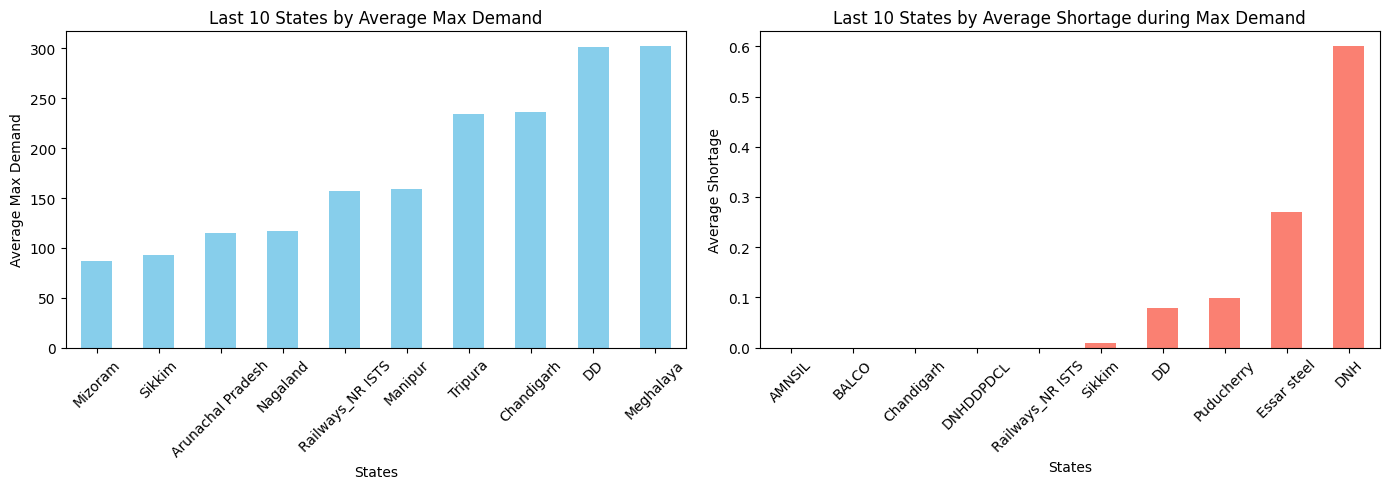

In [9]:
last_10_max_demand = average_max_demand.nsmallest(10)
last_10_shortage = average_shortage.nsmallest(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

last_10_max_demand.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Last 10 States by Average Max Demand')
ax1.set_xlabel('States')
ax1.set_ylabel('Average Max Demand')
ax1.tick_params(axis='x', rotation=45)

last_10_shortage.plot(kind='bar', ax=ax2, color='salmon')
ax2.set_title('Last 10 States by Average Shortage during Max Demand')
ax2.set_xlabel('States')
ax2.set_ylabel('Average Shortage')
ax2.tick_params(axis='x', rotation=45)

# Display the plots
plt.tight_layout()
plt.show()

### Extracting the months and binning them into seasons in the data

In [10]:
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
season_bins = [0, 2, 5, 8, 12]
season_labels = ['Winter', 'Spring', 'Monsoon', 'Post-Monsoon']
df['Season'] = pd.cut(df['Month'], bins=season_bins, labels=season_labels, include_lowest=True)
df[['date', 'Year', 'Month', 'Season']]


date  Year  Month        Season
0      2015-01-01  2015      1        Winter
1      2015-01-01  2015      1        Winter
2      2015-01-01  2015      1        Winter
3      2015-01-01  2015      1        Winter
4      2015-01-01  2015      1        Winter
...           ...   ...    ...           ...
126694 2022-12-31  2022     12  Post-Monsoon
126695 2022-12-31  2022     12  Post-Monsoon
126696 2022-12-31  2022     12  Post-Monsoon
126697 2022-12-31  2022     12  Post-Monsoon
126698 2022-12-31  2022     12  Post-Monsoon

[126699 rows x 4 columns]

In [11]:
df1 = df.groupby(['Season', 'Year'], group_keys=False).apply(lambda x: x.nlargest(10, 'Max.Demand Met during the day(MW)'))
df1.reset_index(drop=True, inplace=True)
df1


Region       States  Max.Demand Met during the day(MW)  \
0       WR  Maharashtra                              18770   
1       WR  Maharashtra                              18499   
2       WR  Maharashtra                              18466   
3       WR  Maharashtra                              18402   
4       WR  Maharashtra                              18168   
..     ...          ...                                ...   
405     WR  Maharashtra                              26949   
406     WR  Maharashtra                              26884   
407     WR  Maharashtra                              26866   
408     WR  Maharashtra                              26808   
409     WR  Maharashtra                              26779   

     Shortage during maximum Demand(MW)  Energy Met (MU)       date  Month  \
0                                 383.0            382.6 2014-02-05      2   
1                                 260.0            387.6 2014-02-06      2   
2                                 322.0            371.0 2014-01-30      1   
3                                 231.0            365.1 2014-01-31      1   
4                                  95.0            380.3 2014-02-08      2   
..                                  ...              ...        ...    ...   
405                                 0.0            554.2 2022-12-28     12   
406                                 0.0            548.7 2022-12-29     12   
407                                 0.0            551.1 2022-12-23     12   
408                                 0.0            554.7 2022-12-07     12   
409                                 0.0            554.6 2022-12-06     12   

     Year        Season  
0    2014        Winter  
1    2014        Winter  
2    2014        Winter  
3    2014        Winter  
4    2014        Winter  
..    ...           ...  
405  2022  Post-Monsoon  
406  2022  Post-Monsoon  
407  2022  Post-Monsoon  
408  2022  Post-Monsoon  
409  2022  Post-Monsoon  

[410 rows x 9 columns]

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Region                              410 non-null    object        
 1   States                              410 non-null    object        
 2   Max.Demand Met during the day(MW)   410 non-null    int64         
 3   Shortage during maximum Demand(MW)  410 non-null    float64       
 4   Energy Met (MU)                     410 non-null    float64       
 5   date                                410 non-null    datetime64[ns]
 6   Month                               410 non-null    int32         
 7   Year                                410 non-null    int32         
 8   Season                              410 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(2), int32(2), int64(1), object(2)
memory usage: 23.1+ KB

### Demand trends over the seasons through years, in state

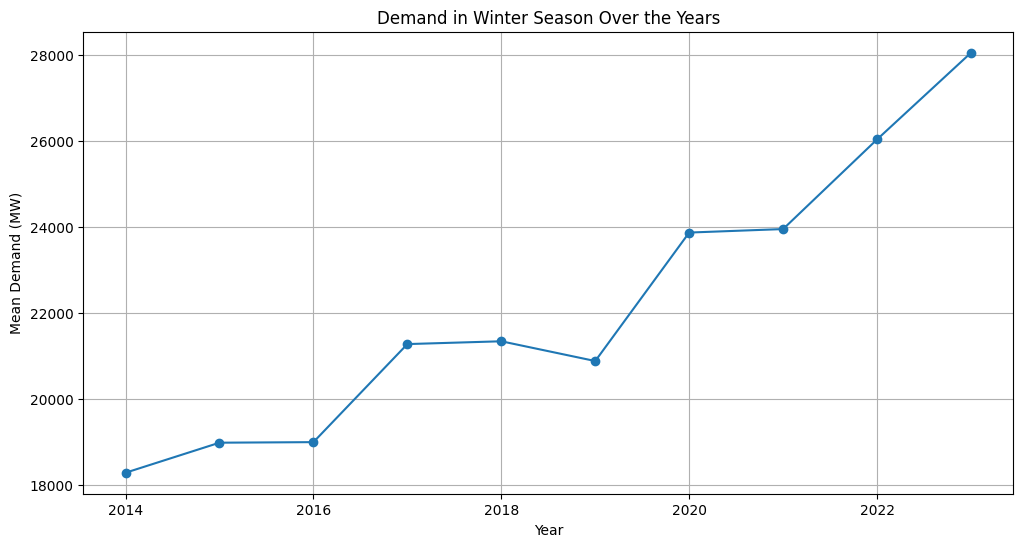

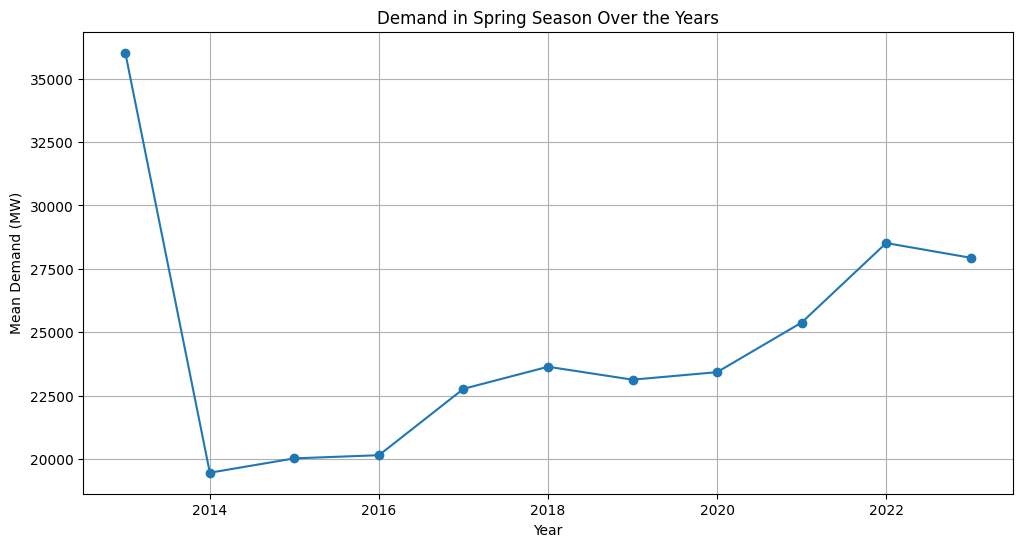

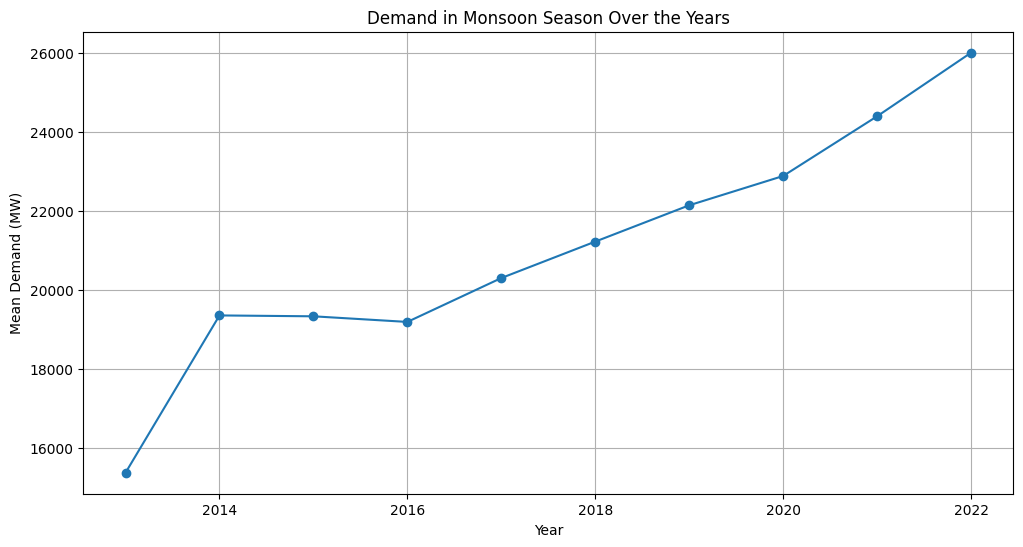

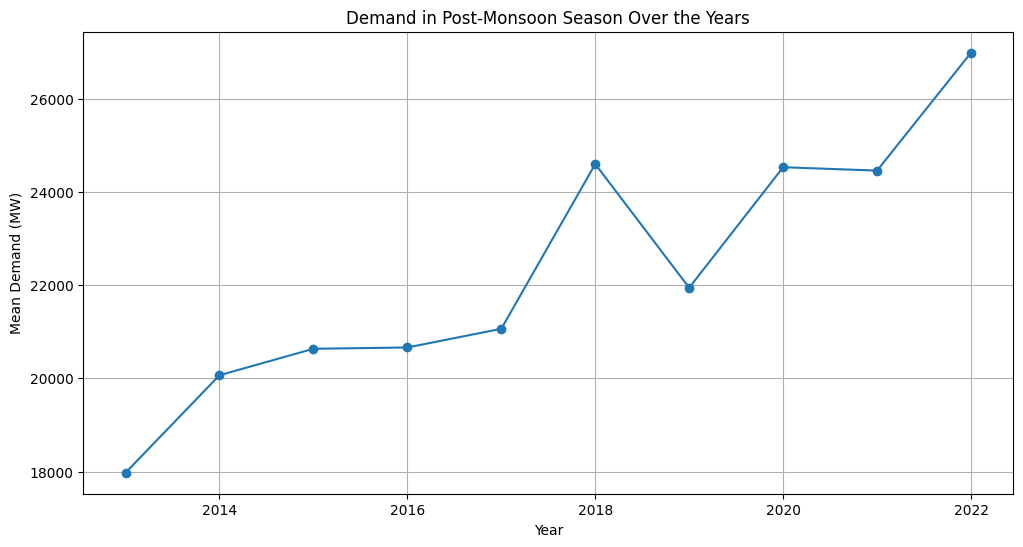

In [13]:
seasons = df1['Season'].unique()
for season in seasons:
    season_data = df1[df1['Season'] == season]
    seasonal_demand = season_data.groupby('Year')['Max.Demand Met during the day(MW)'].mean()
    plt.figure(figsize=(12, 6))
    plt.plot(seasonal_demand.index, seasonal_demand, marker='o')
    plt.title(f'Demand in {season} Season Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Demand (MW)')
    plt.grid(True)
    plt.show()


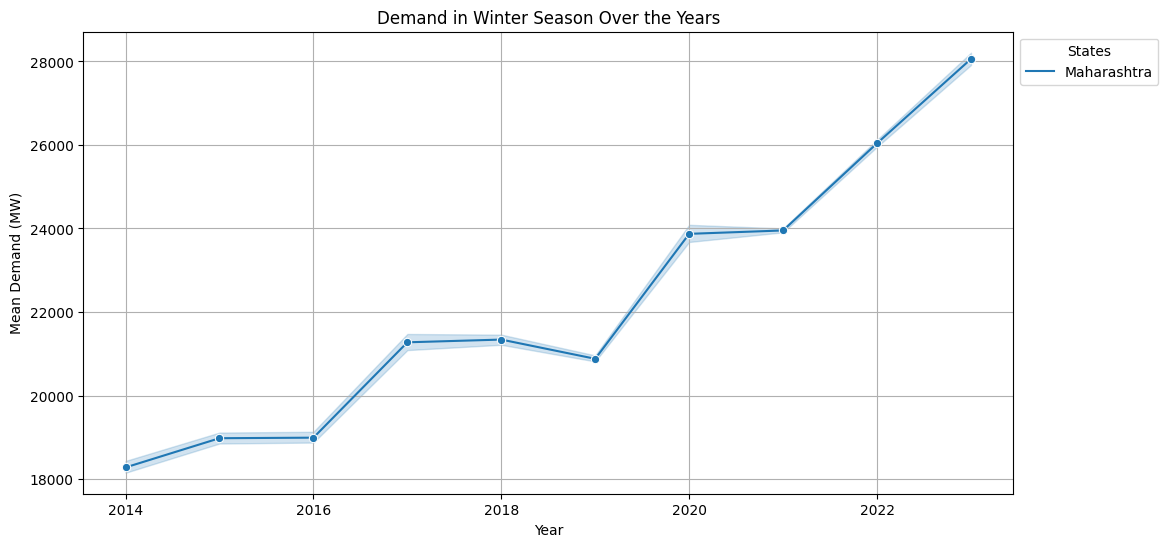

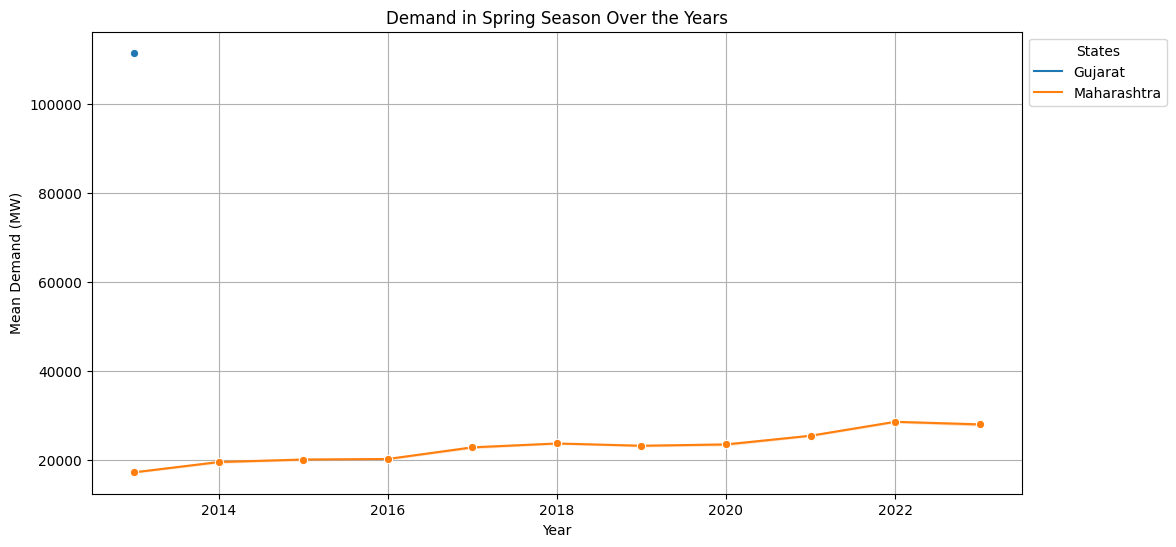

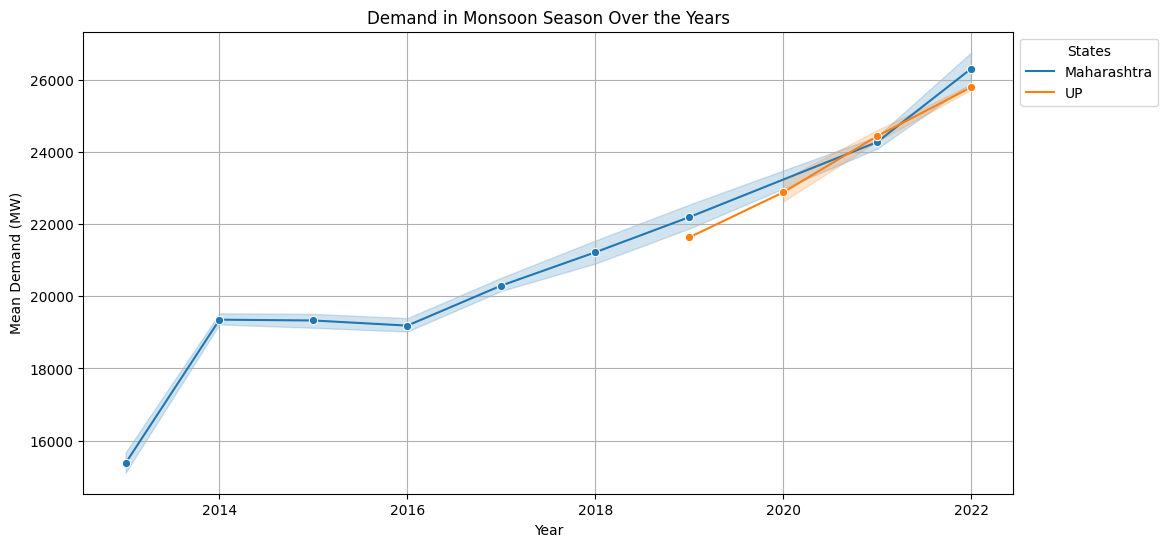

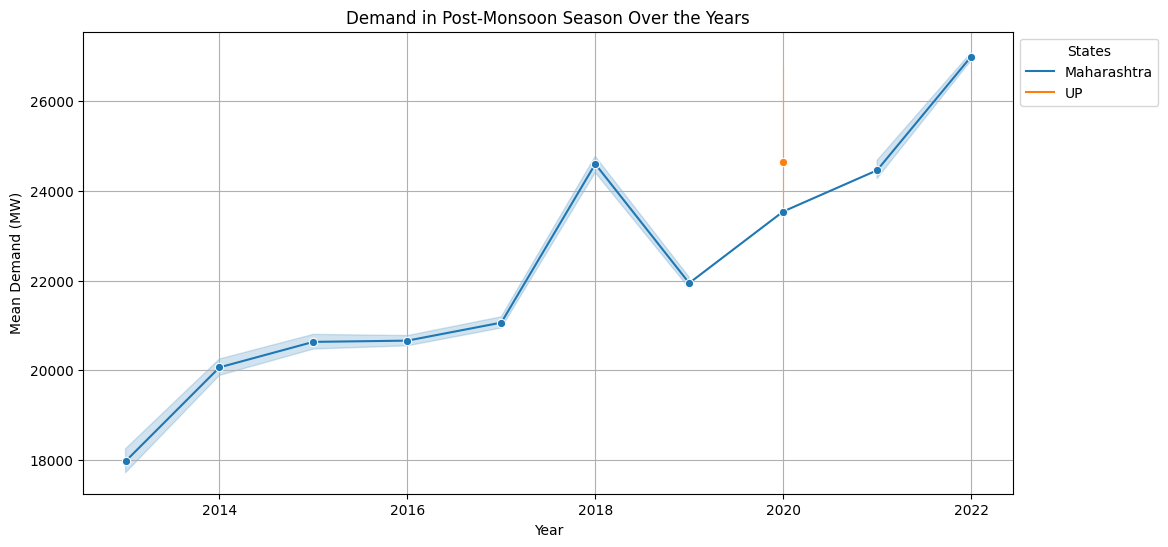

In [14]:
seasons = df1['Season'].unique()
for season in seasons:
    season_data = df1[df1['Season'] == season]
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Max.Demand Met during the day(MW)', hue='States', data=season_data, marker='o')
    plt.title(f'Demand in {season} Season Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Demand (MW)')
    plt.grid(True)
    plt.legend(title='States', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


#### Accorsing to this reddif [article]https://bitly.ws/Yty6), these are the top 10 electricity consumption states, Gujarat, Andhra Pradesh, Maharashtra, Tamil Nadu, Punjab, Karnataka, Haryana, Madhya Pradesh, Rajasthan and Uttar Pradesh

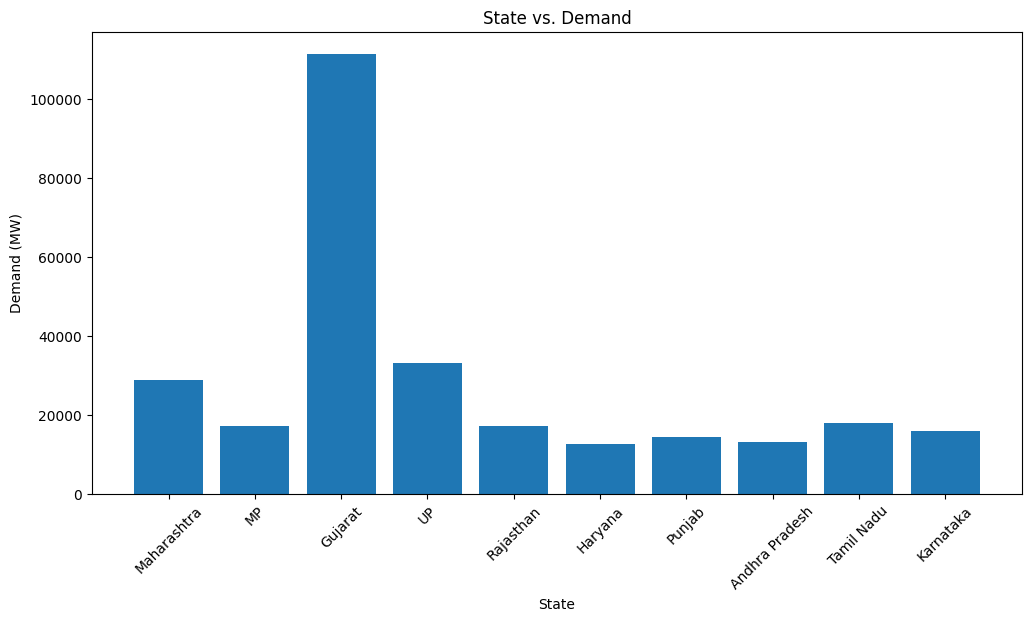

In [15]:
power_states = ['Gujarat', 'Andhra Pradesh', 'Maharashtra', 'Tamil Nadu', 'Punjab',
                    'Karnataka', 'Haryana', 'MP', 'Rajasthan', 'UP']
power_states_data = df[df['States'].isin(power_states)]
plt.figure(figsize=(12, 6))
plt.bar(power_states_data['States'], power_states_data['Max.Demand Met during the day(MW)'])
plt.title('State vs. Demand')
plt.xlabel('State')
plt.ylabel('Demand (MW)')
plt.xticks(rotation=45)
plt.show()


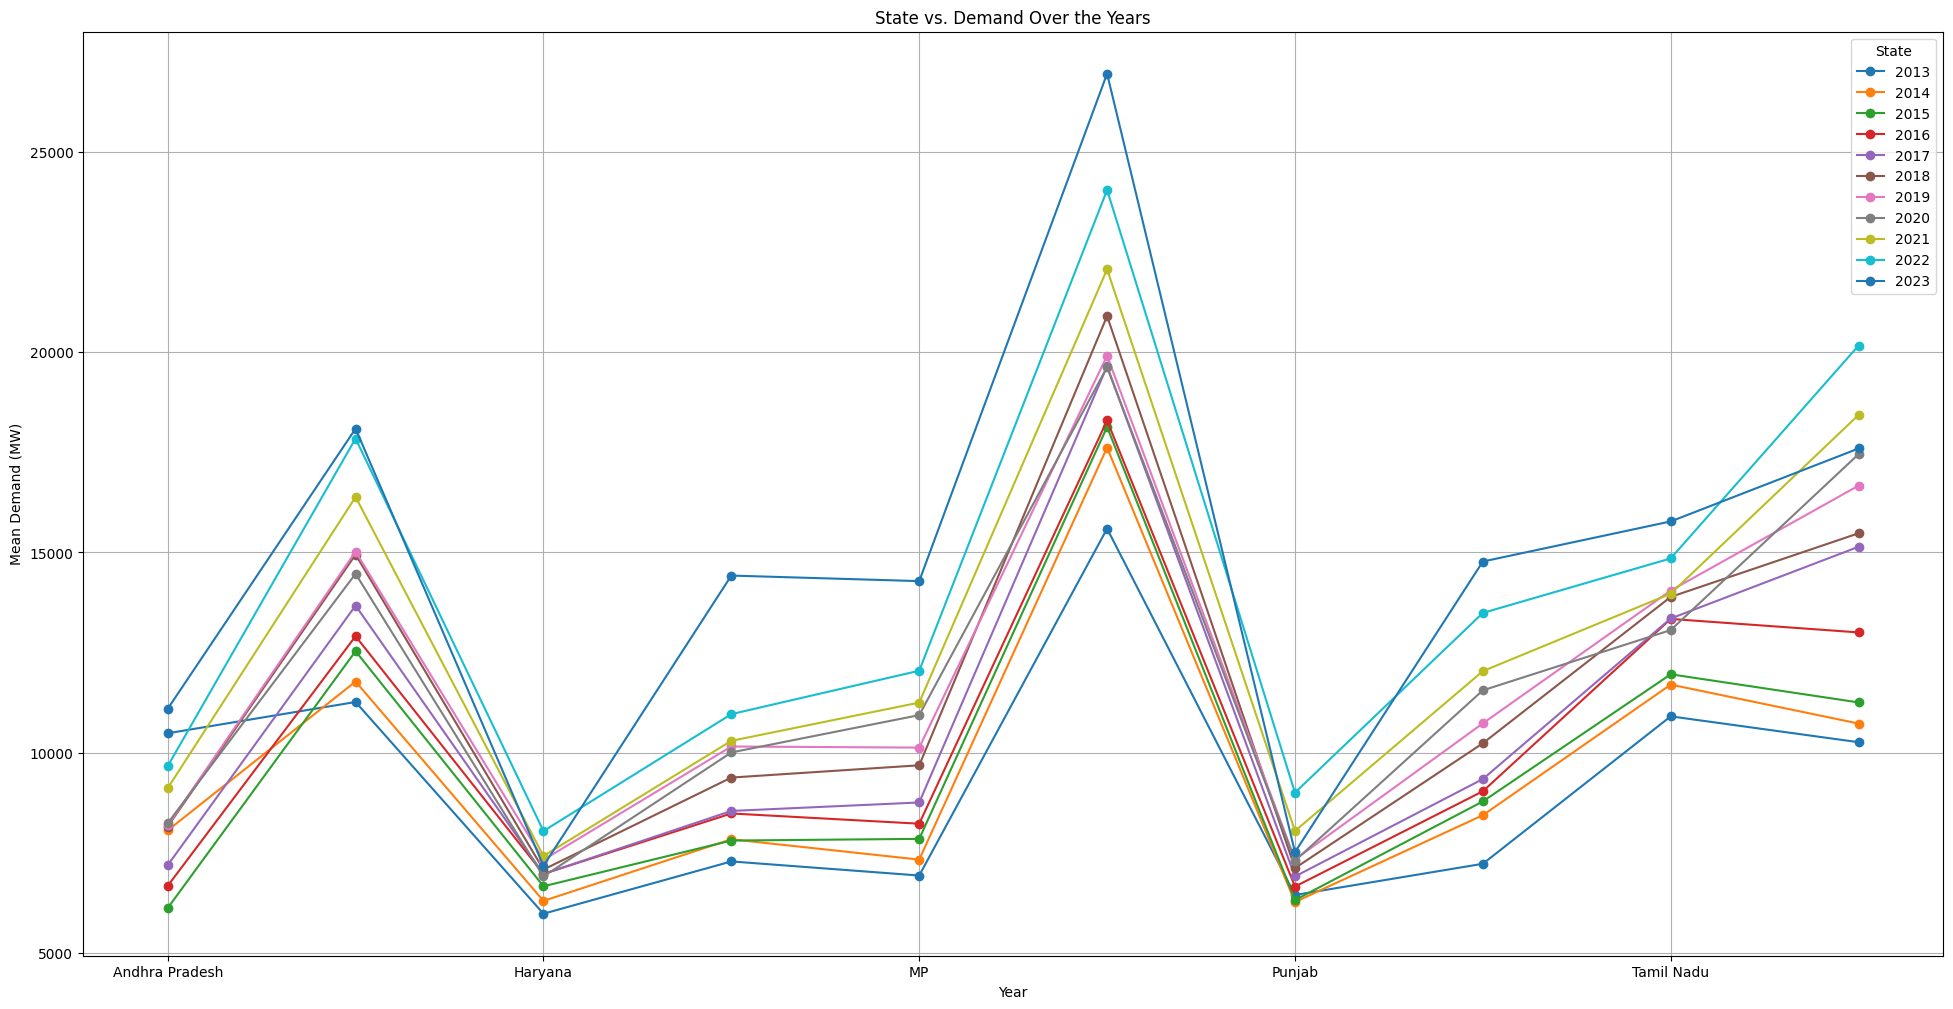

In [16]:
power_states_data = df[df['States'].isin(power_states)]
state_demand_over_years = power_states_data.groupby(['States', 'Year'])['Max.Demand Met during the day(MW)'].mean().unstack()
state_demand_over_years.plot(kind='line', marker='o', figsize=(24, 12))
plt.title('State vs. Demand Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Demand (MW)')
plt.grid(True)
plt.legend(title='State', loc='upper right')
plt.show()


### Checking the fluctuations in demand seasonwise over the years for selected states

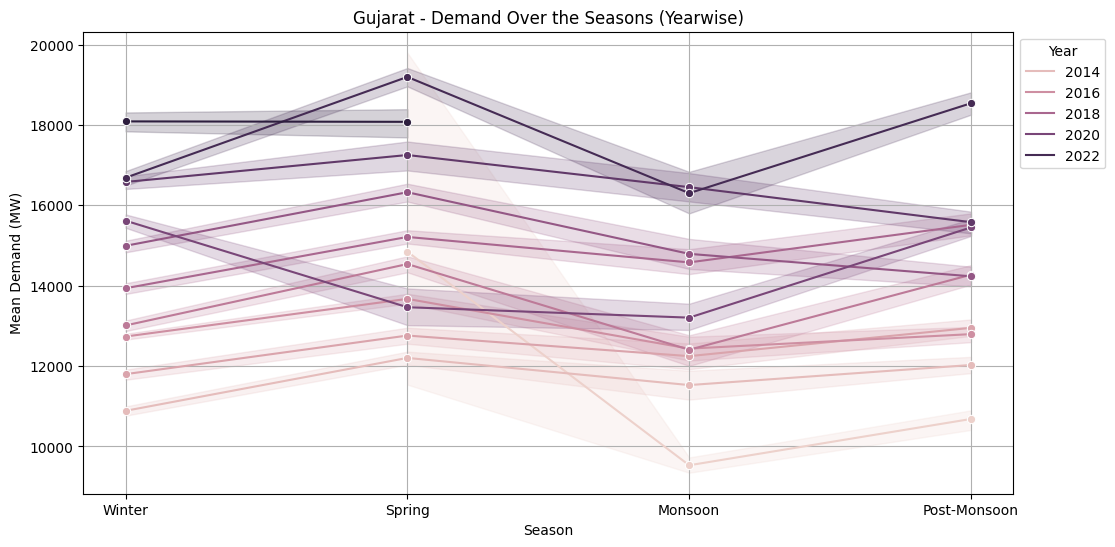

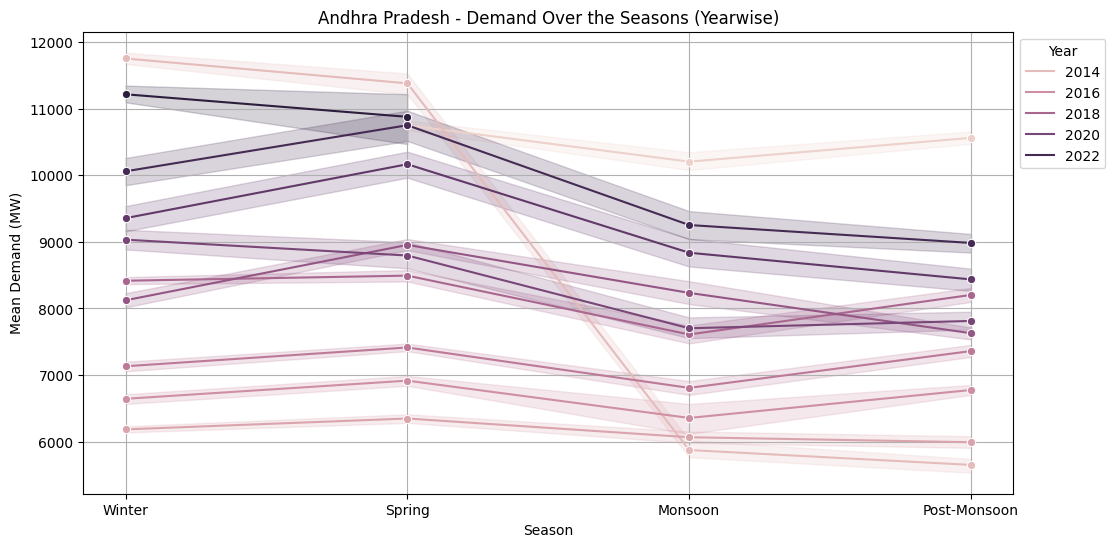

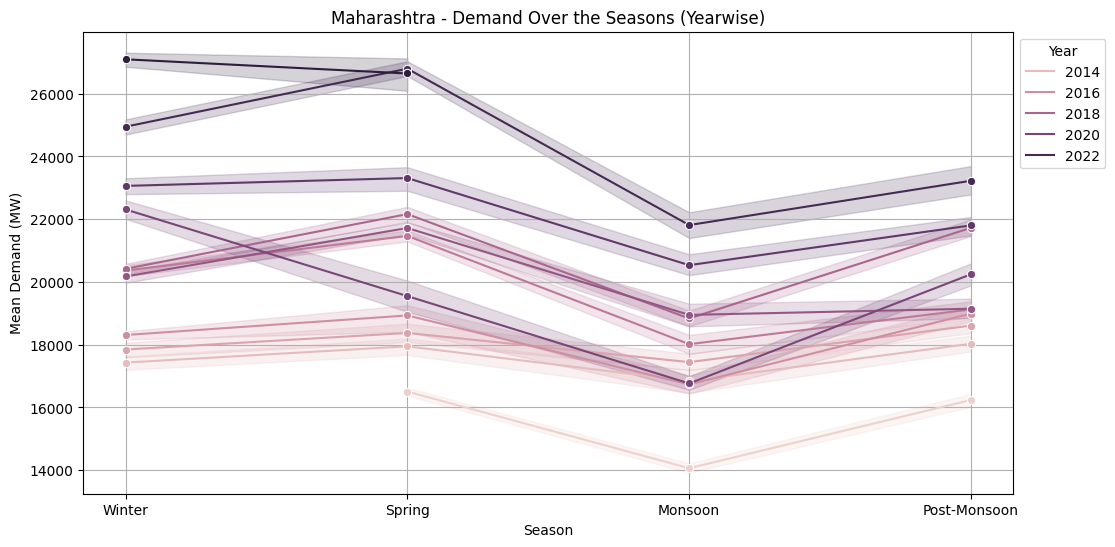

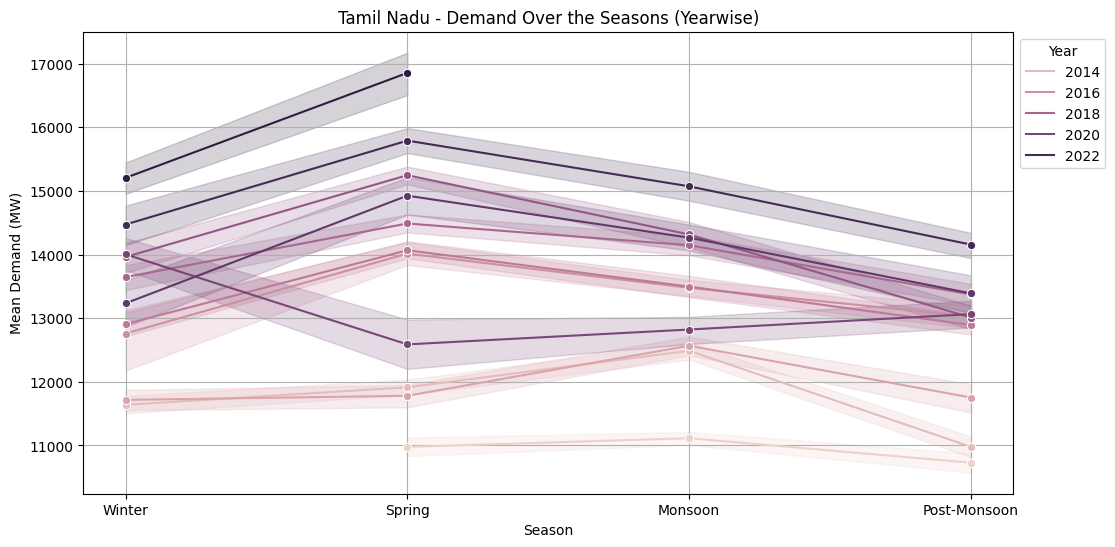

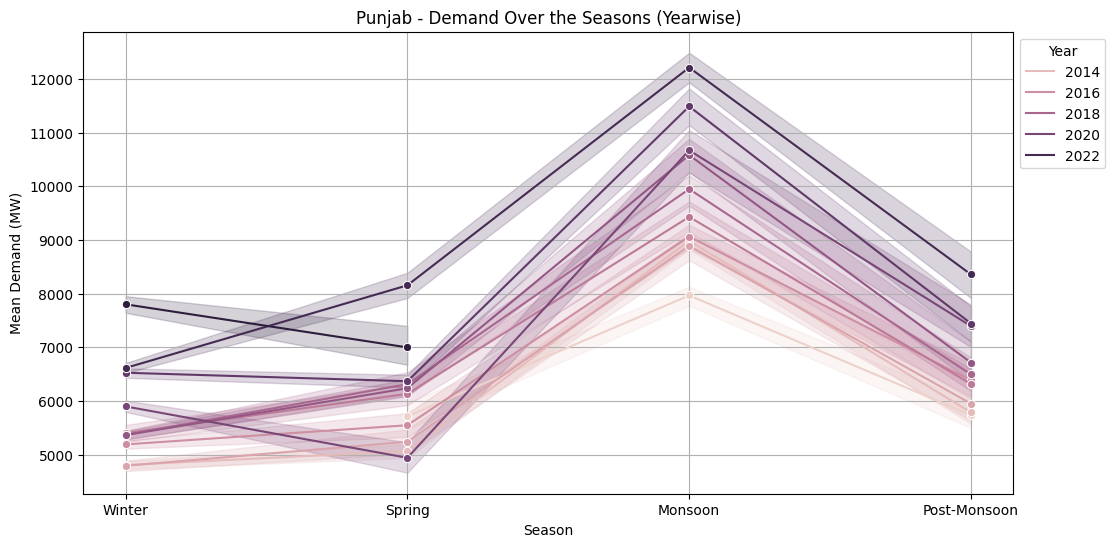

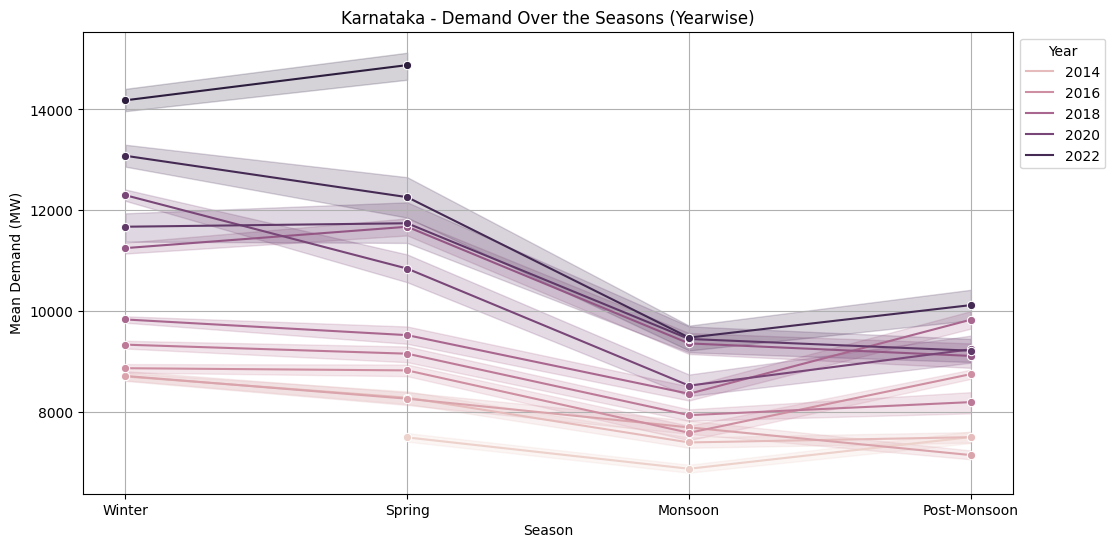

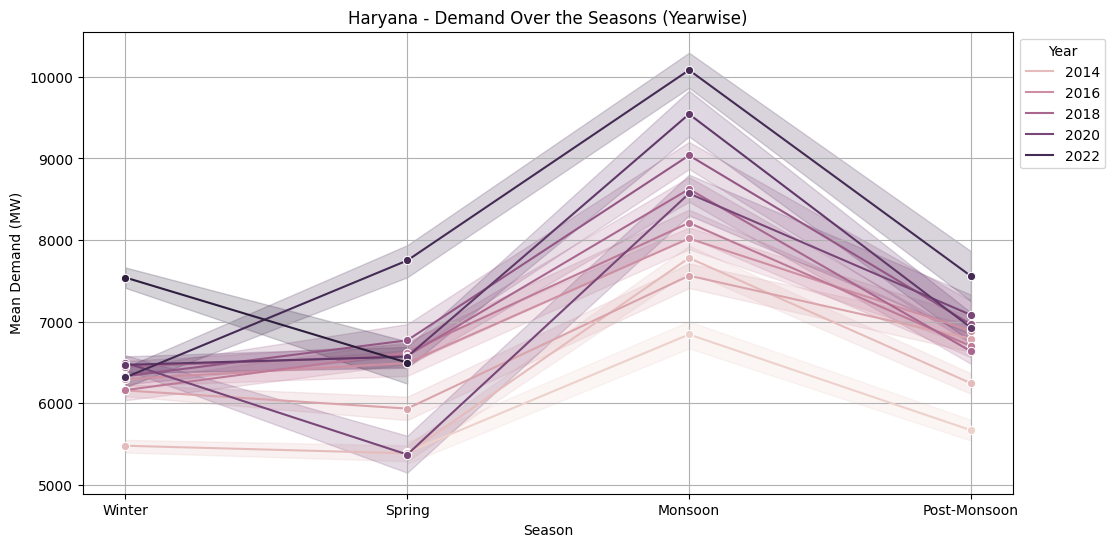

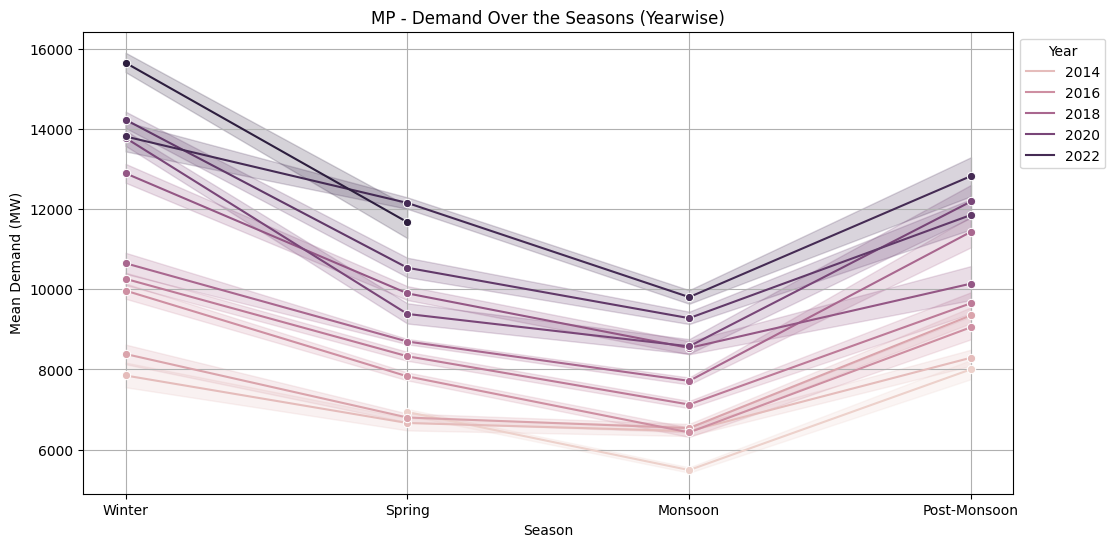

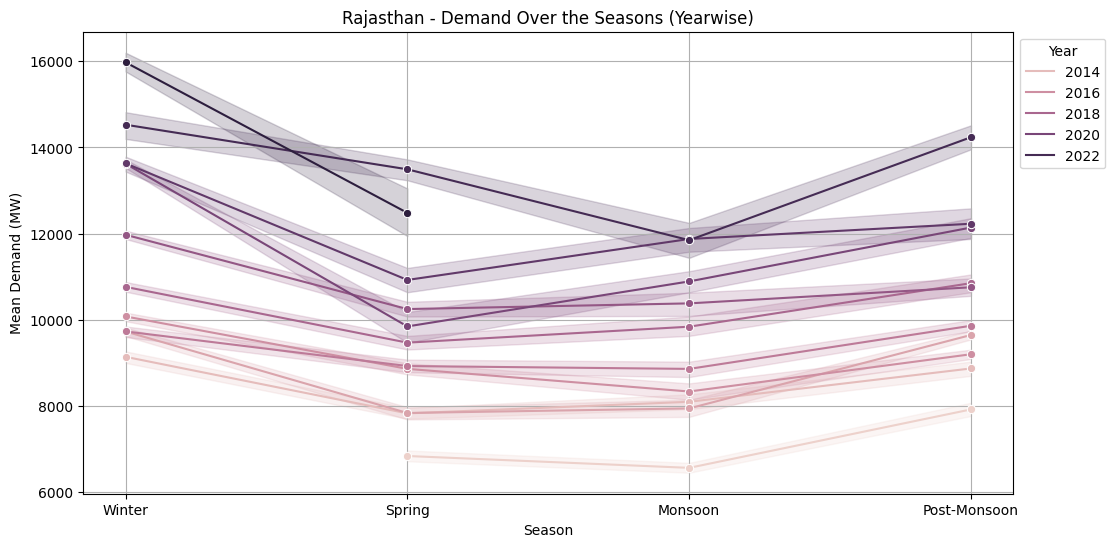

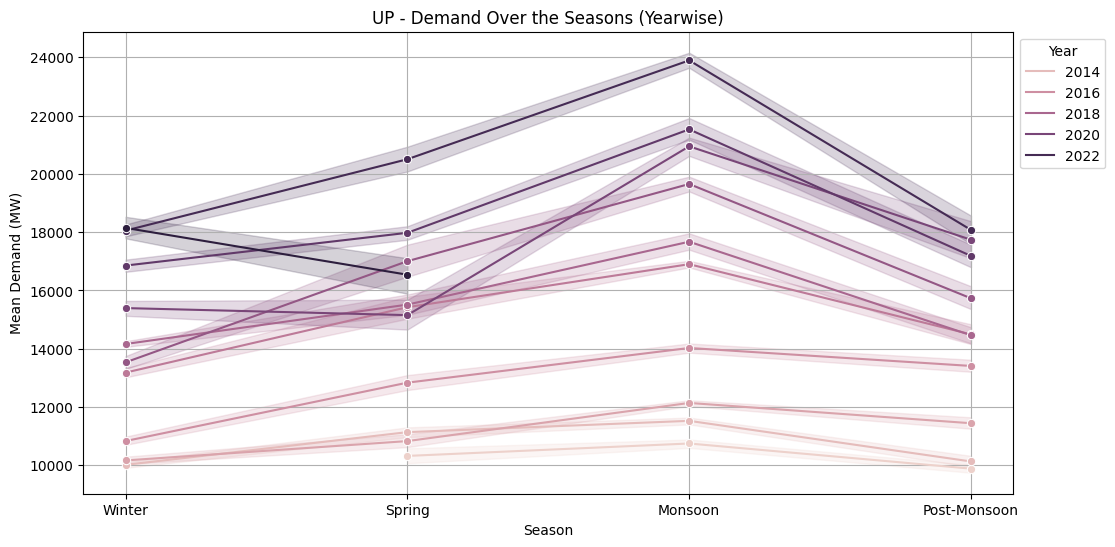

In [17]:
power_states_data = df[df['States'].isin(power_states)]
for state in power_states:
    state_data = power_states_data[power_states_data['States'] == state]
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Season', y='Max.Demand Met during the day(MW)', hue='Year', data=state_data, marker='o')
    plt.title(f'{state} - Demand Over the Seasons (Yearwise)')
    plt.xlabel('Season')
    plt.ylabel('Mean Demand (MW)')
    plt.grid(True)
    plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

### Exploring the shortage during max demand in states over the years wrt seasons

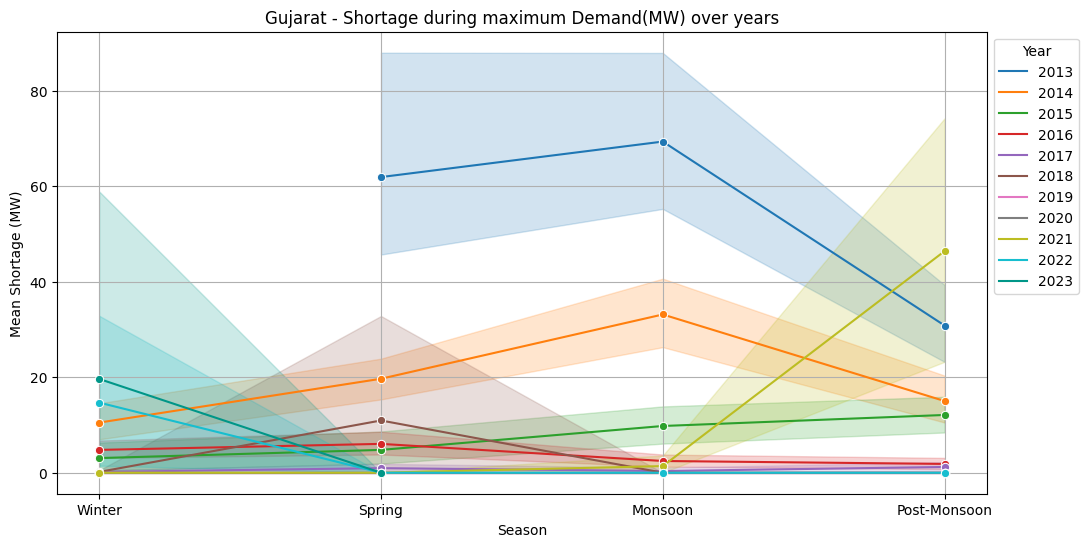

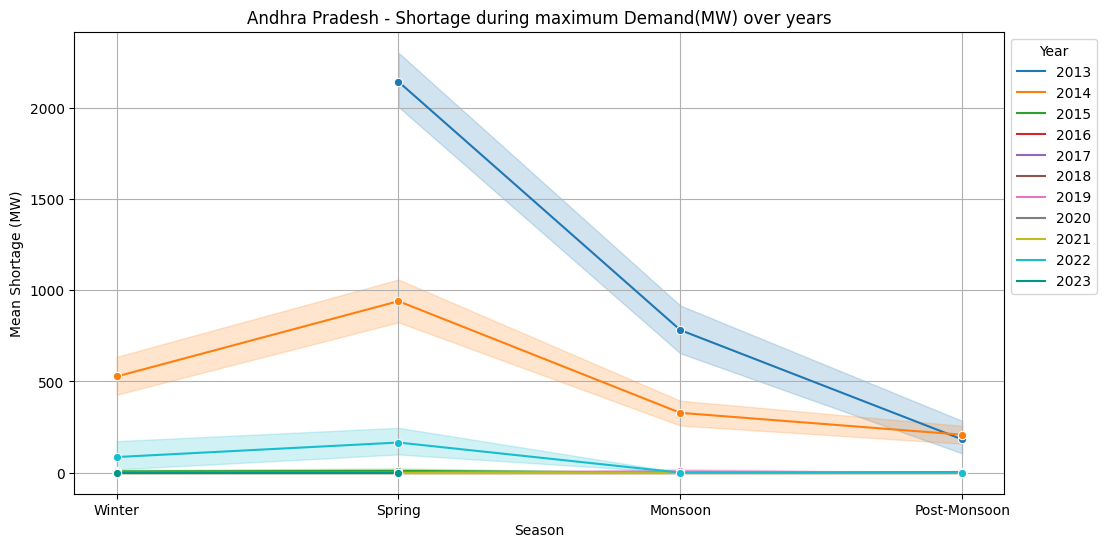

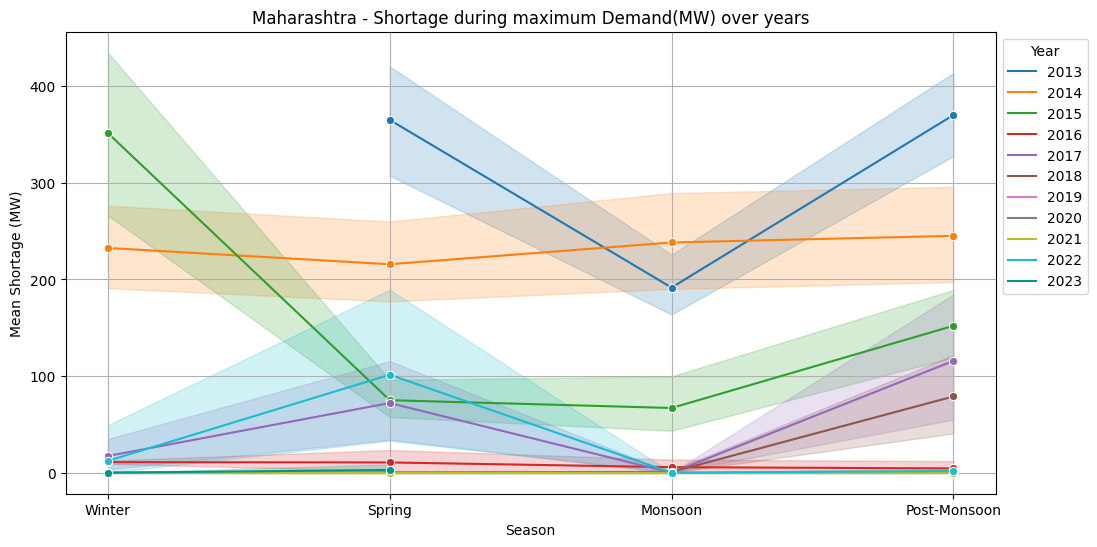

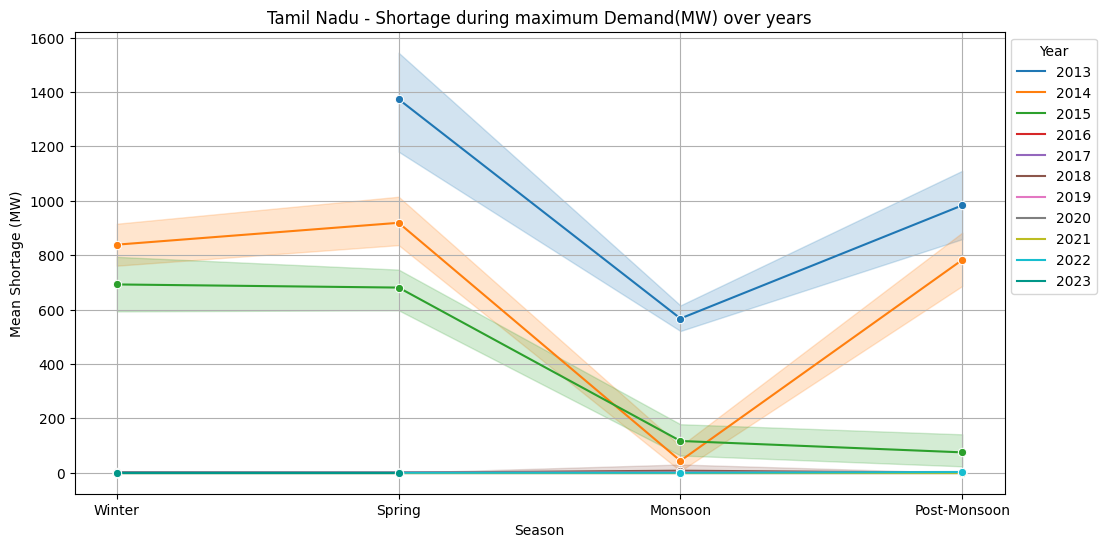

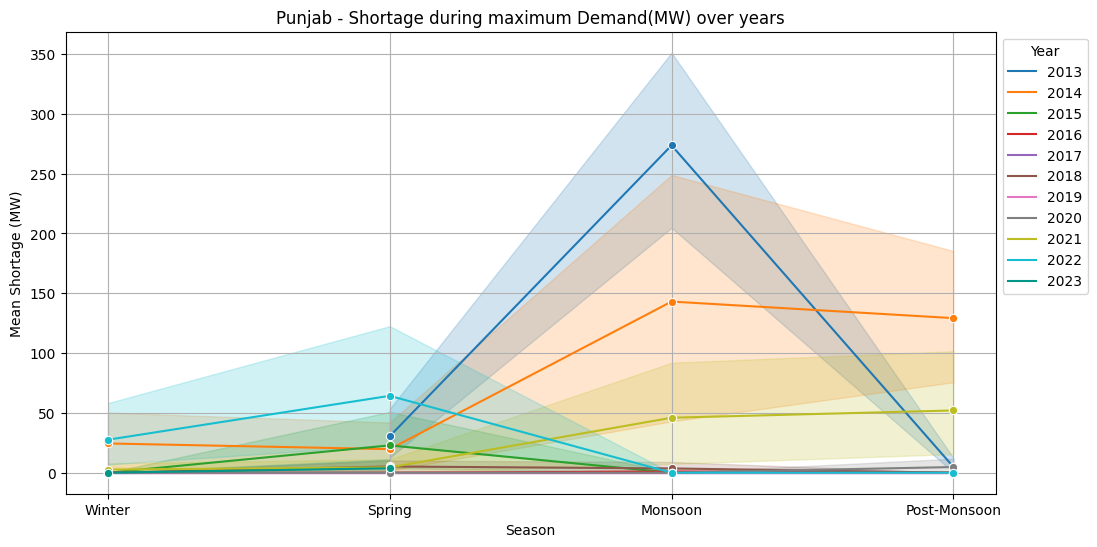

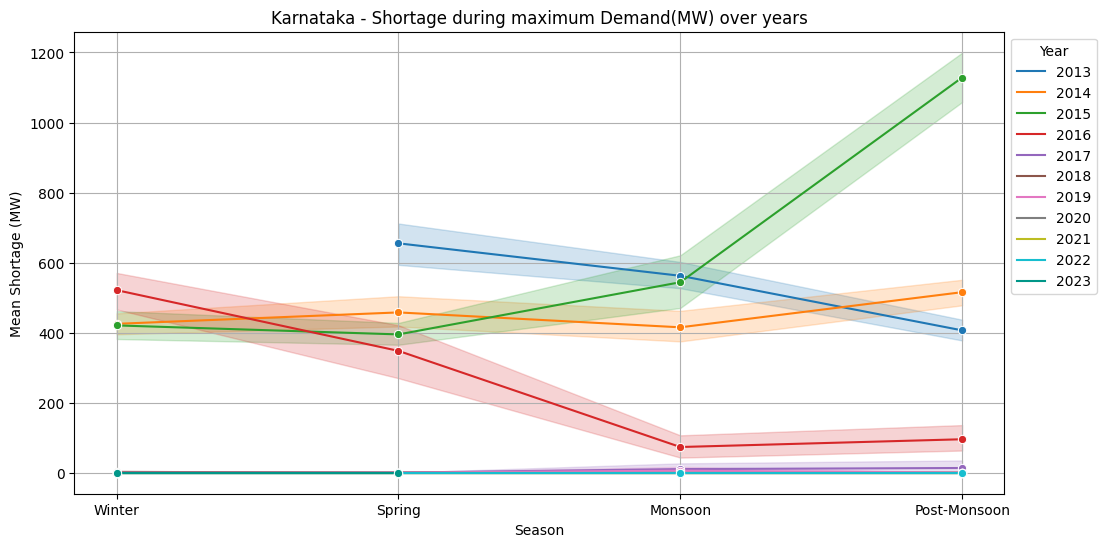

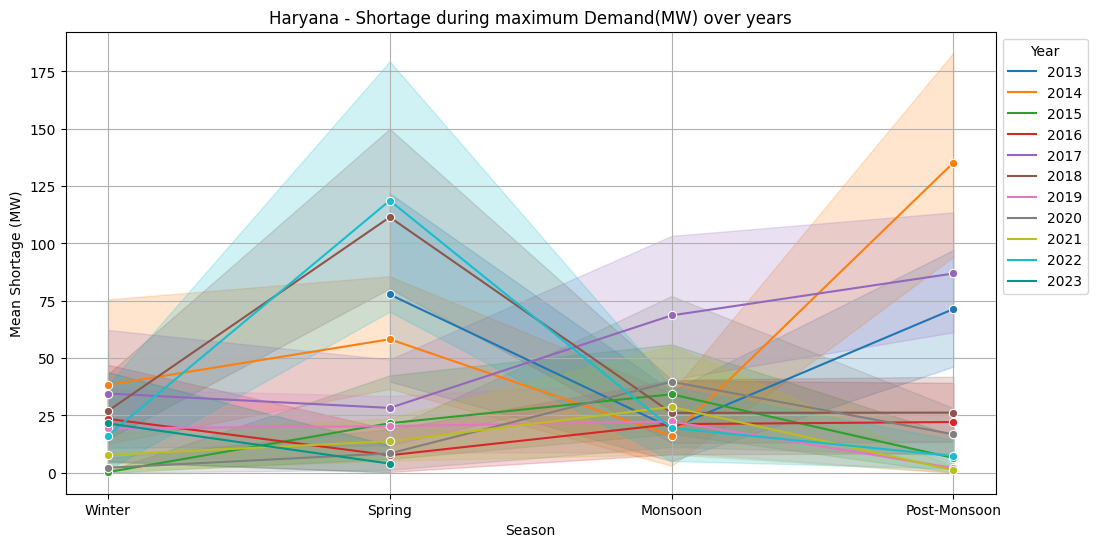

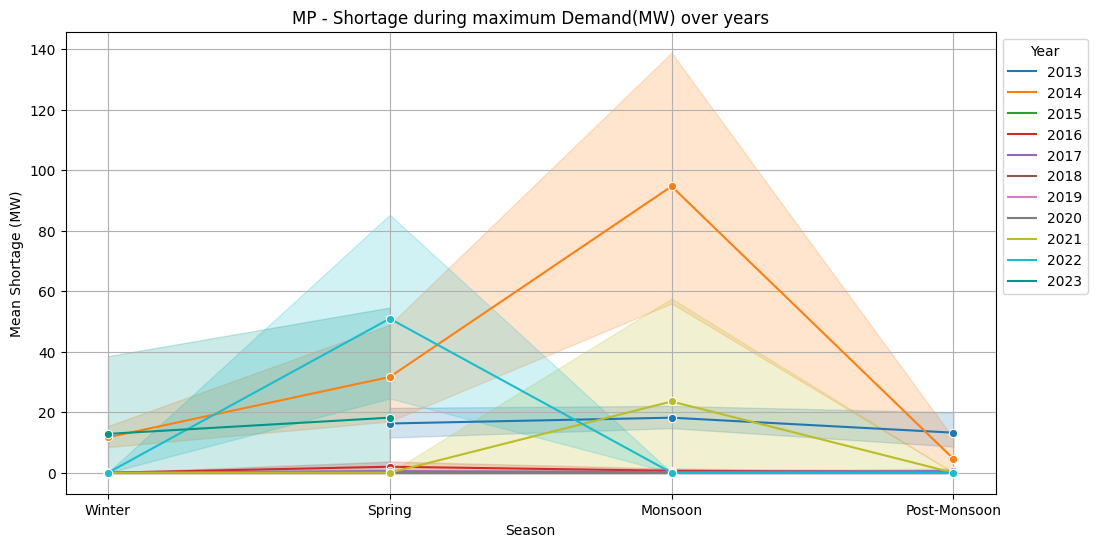

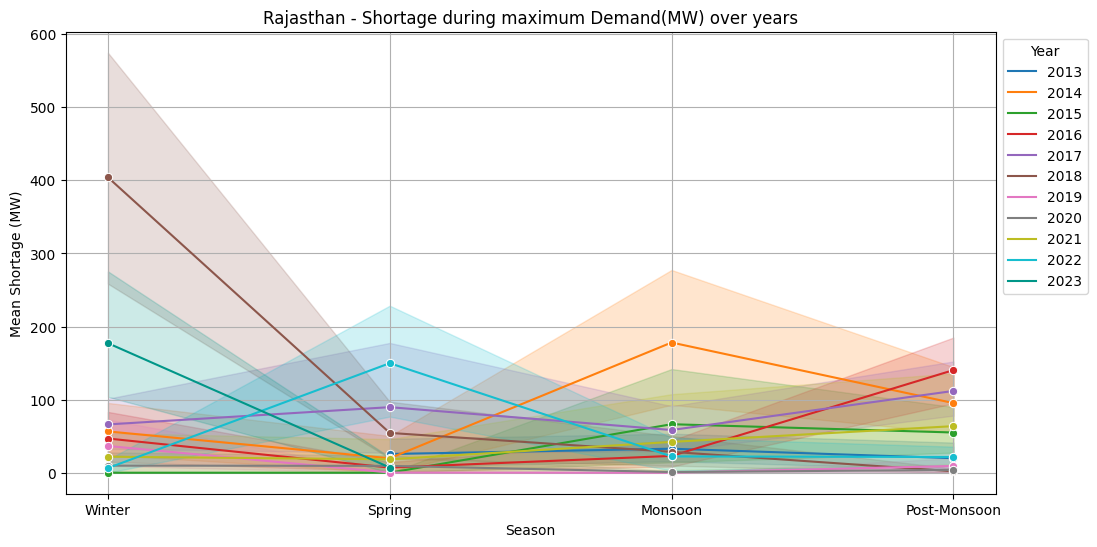

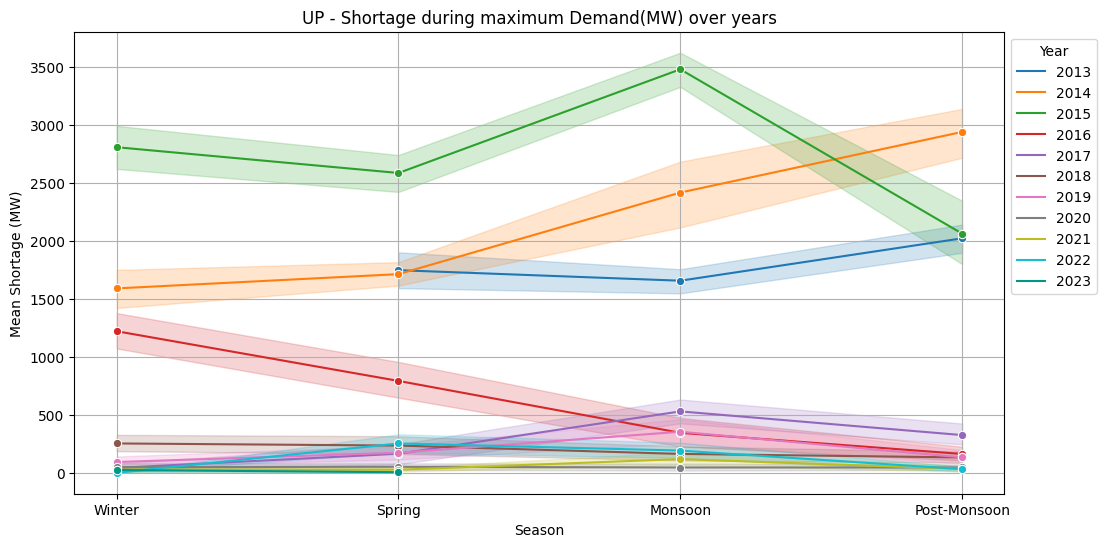

In [18]:
for state in power_states:
    state_data = power_states_data[power_states_data['States'] == state]
    plt.figure(figsize=(12, 6))
    custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#009688"]
    sns.lineplot(x='Season', y='Shortage during maximum Demand(MW)', hue='Year', data=state_data, marker='o', palette=custom_palette)
    plt.title(f'{state} - Shortage during maximum Demand(MW) over years')
    plt.xlabel('Season')
    plt.ylabel('Mean Shortage (MW)')
    plt.grid(True)
    plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

### Forecasting

In [19]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [20]:
df['date'] = pd.to_datetime(df['date'])
df['demand'] = df['Max.Demand Met during the day(MW)']
df['season'] = df['Season']

In [21]:
df['date'].describe()

count                           126699
mean     2018-03-31 03:13:08.056733440
min                2013-03-31 00:00:00
25%                2015-10-06 00:00:00
50%                2018-03-20 00:00:00
75%                2020-10-05 00:00:00
max                2023-03-31 00:00:00
Name: date, dtype: object

In [22]:
df['demand'].describe()

count    126699.000000
mean       4539.315543
std        5286.269992
min           0.000000
25%         328.000000
50%        2397.000000
75%        7261.500000
max      111539.000000
Name: demand, dtype: float64

In [23]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(df['demand'])
adfuller_result

(-40.64179104110172,
 0.0,
 71,
 126627,
 {'1%': -3.4304016432717153,
  '5%': -2.8615628255698966,
  '10%': -2.56678214924292},
 2522385.697190518)

In [24]:
print('p-value:', adfuller_result[1])

p-value: 0.0


In [25]:
demand_data = df['demand']
p = 1 
d = 0 
q = 1 
model = ARIMA(demand_data, order=(p, d, q))
results = model.fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:               126699
Model:                 ARIMA(1, 0, 1)   Log Likelihood            -1264409.799
Date:                Thu, 26 Oct 2023   AIC                        2528827.598
Time:                        16:43:35   BIC                        2528866.596
Sample:                             0   HQIC                       2528839.309
                             - 126699                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4539.3155     18.292    248.154      0.000    4503.463    4575.168
ar.L1          0.3825      0.016     24.174      0.000       0.351       0.413
ma.L1         -0.2375      0.017    -13.947      0.000      -0.271      -0.204
sigma2      2.736e+07      0.003   8.15e+09      0.000    2.74e+07    2.74e+07
===================================================================================
Ljung-Box (L1) (Q):                  23.17   Jarque-Bera (JB):            150281.80
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             1.54
Prob(H) (two-sided):                  0.28   Kurtosis:                         7.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.62e+23. Standard errors may be unstable.
"""

In [27]:
forecast_periods = 365 * 5 
forecast = results.forecast(steps=forecast_periods)
forecast


126699    3845.390970
126700    4273.900471
126701    4437.798515
126702    4500.486900
126703    4524.464207
             ...     
128519    4539.315543
128520    4539.315543
128521    4539.315543
128522    4539.315543
128523    4539.315543
Name: predicted_mean, Length: 1825, dtype: float64

In [28]:
df['date'].tail()

126694   2022-12-31
126695   2022-12-31
126696   2022-12-31
126697   2022-12-31
126698   2022-12-31
Name: date, dtype: datetime64[ns]